In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sn
%matplotlib inline

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [25]:
data = pd.read_csv("flight_model_training_testing_data.csv",index_col=0)

In [26]:
data.head()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,travel_route_Kolkata-Bangalore,travel_route_Kolkata-Chennai,travel_route_Kolkata-Delhi,travel_route_Kolkata-Hyderabad,travel_route_Kolkata-Mumbai,travel_route_Mumbai-Bangalore,travel_route_Mumbai-Chennai,travel_route_Mumbai-Delhi,travel_route_Mumbai-Hyderabad,travel_route_Mumbai-Kolkata
0,1,1,25.67,29,71058,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,10.42,23,6534,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,15.58,48,5040,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,9.00,17,6892,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,8.08,16,52063,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
#create x and y where x are features for the model and y as target
x = data.drop('price',axis=1)
y = data['price']

In [11]:
#use sklearn train test spilt for spilt our data in parts like training data and testing data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =101, shuffle=True)

#print shape of x train,y train, x test and y test 
print('x_train shape:-',x_train.shape)
print('x_test shape:-',x_test.shape)
print('y_train shape:-',y_train.shape)
print('y_test shape:-',y_test.shape)


#import model from sklearn
from sklearn.svm import SVR
print('model name :- SVR')

svr = SVR()

#training model input as x_train and y_tarin
svr.fit(x_train,y_train)

#print('score on the testing data :-',svr.score(x_test,y_test))
#print('score on the training data :-',svr.score(x_train,y_train))

#finding error methods 
from sklearn import metrics

#model is creted show give x test data as input and retuen predictd data 
predictions = svr.predict(x_test)

#MAE
print('MAE:-',metrics.mean_absolute_error(y_test,predictions))

#MSE
print('MSE:-',metrics.mean_squared_error(y_test,predictions))

#RMSE
print('RMSE:-',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

x_train shape:- (210100, 52)
x_test shape:- (90044, 52)
y_train shape:- (210100,)
y_test shape:- (90044,)
model name :- SVR
MAE:- 15477.853227362479
MSE:- 674074789.8099297
RMSE:- 25962.95032945851


In [12]:
import pickle

# Assuming you have trained your SVR model and stored it in the 'svr_model' variable

# Specify the file path to save the model
file_path = 'model_normal_svr.pkl'

# Save the model to a .pkl file
with open(file_path, 'wb') as file:
    pickle.dump(svr, file)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


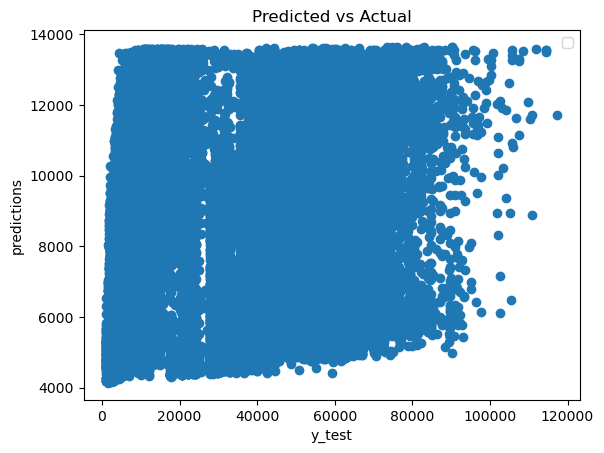

In [13]:
# Plotting the predicted values and actual values
plt.scatter(y_test,predictions)


# Customizing the plot
plt.title("Predicted vs Actual")
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.legend()

# Displaying the plot
plt.show()

In [15]:
len(y_test)

90044

In [16]:
range(len(y_test))

range(0, 90044)

In [23]:
i = 0
for true_value, pred_value in zip(y_test, predictions):
    print(f"Actual: {true_value}, Predicted: {pred_value}")
    i+=1
    if i == 100:
        break

Actual: 32634, Predicted: 9292.65330501761
Actual: 12990, Predicted: 12887.045380150892
Actual: 4896, Predicted: 5105.921686878775
Actual: 38648, Predicted: 10117.988422742097
Actual: 5955, Predicted: 10204.073944722542
Actual: 10113, Predicted: 9005.67374659293
Actual: 2339, Predicted: 7007.037039140837
Actual: 4793, Predicted: 7408.165017136522
Actual: 53164, Predicted: 11730.531702832712
Actual: 60555, Predicted: 7214.95083414015
Actual: 4348, Predicted: 5991.597322834869
Actual: 3453, Predicted: 4533.83827670157
Actual: 3697, Predicted: 8199.496973763866
Actual: 60508, Predicted: 11554.100581720888
Actual: 4613, Predicted: 5605.798563509691
Actual: 7597, Predicted: 11064.826469828102
Actual: 5060, Predicted: 7397.982592945133
Actual: 40843, Predicted: 5970.647685961534
Actual: 4000, Predicted: 4425.12352473138
Actual: 5750, Predicted: 6719.274907855105
Actual: 29825, Predicted: 5153.051748265605
Actual: 2476, Predicted: 4568.6258948435225
Actual: 12138, Predicted: 11733.07901530623

32233     32634
158416    12990
271986     4896
20060     38648
220879     5955
          ...  
59096     16311
202937    60410
133449    72125
205125     5823
158283    50409
Name: price, Length: 100, dtype: int64